In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os, time, warnings
color = sns.color_palette()
warnings.filterwarnings("ignore")
%matplotlib inline

loan = pd.read_csv("../input/loan.csv")

## General Information of the Dataset

In [2]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

## EDA

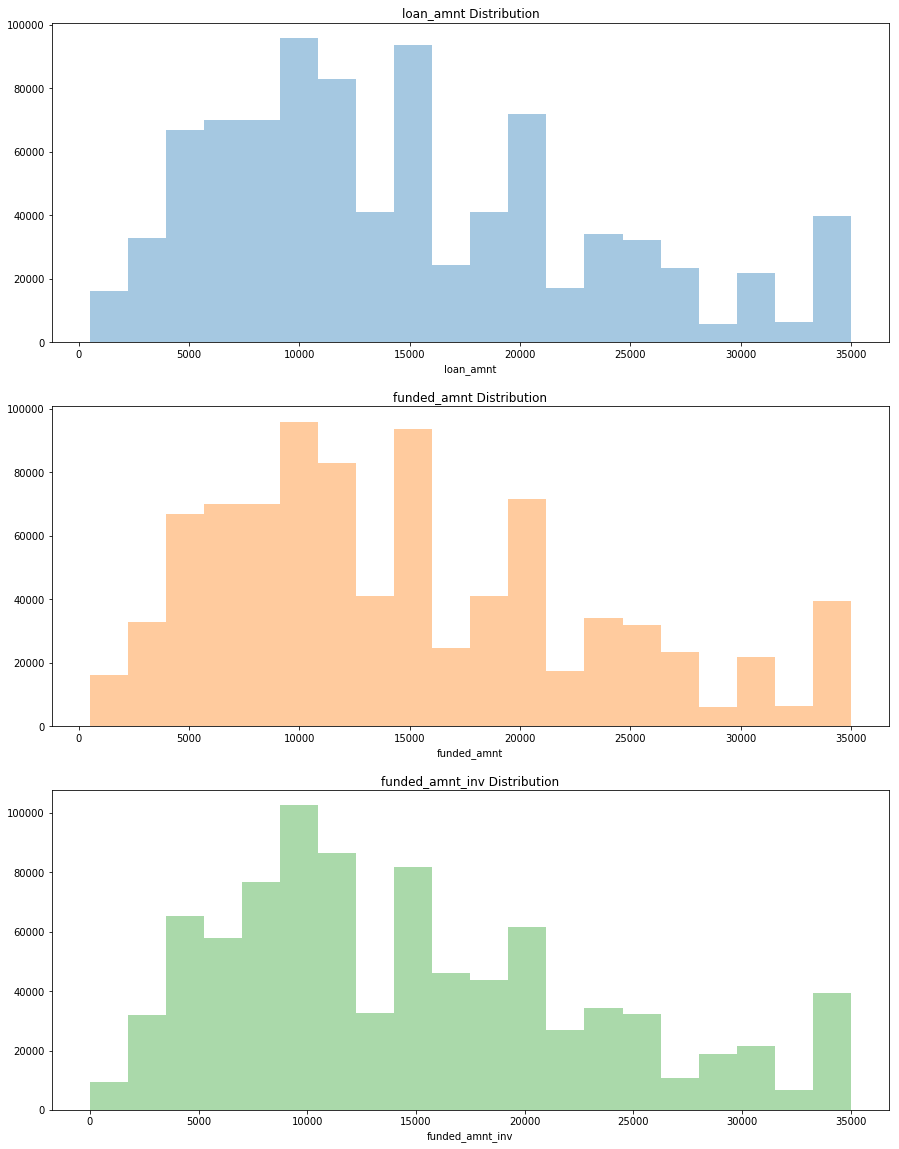

In [5]:
fig, ax = plt.subplots(3, 1, figsize = (15, 20))
for i, l in enumerate(["loan_amnt", "funded_amnt", "funded_amnt_inv"]):
    sns.distplot(loan[l], kde = False, bins = 20, color = color[i], ax = ax[i])
    ax[i].set_title("{} Distribution".format(l))
plt.show()

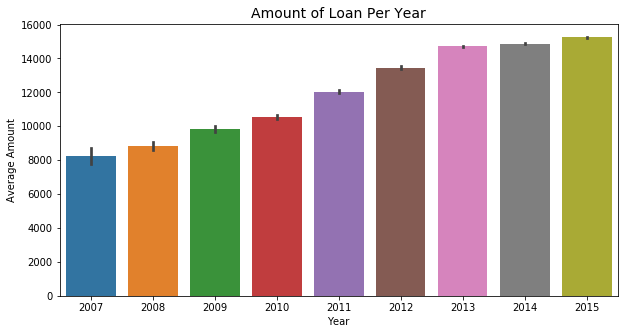

In [6]:
loan["year"] = pd.to_datetime(loan["issue_d"]).dt.year

plt.figure(figsize = (10, 5))
sns.barplot(loan["year"], loan["loan_amnt"])
plt.title("Amount of Loan Per Year", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Average Amount")
plt.show()

## Good Loan vs Bad Loan

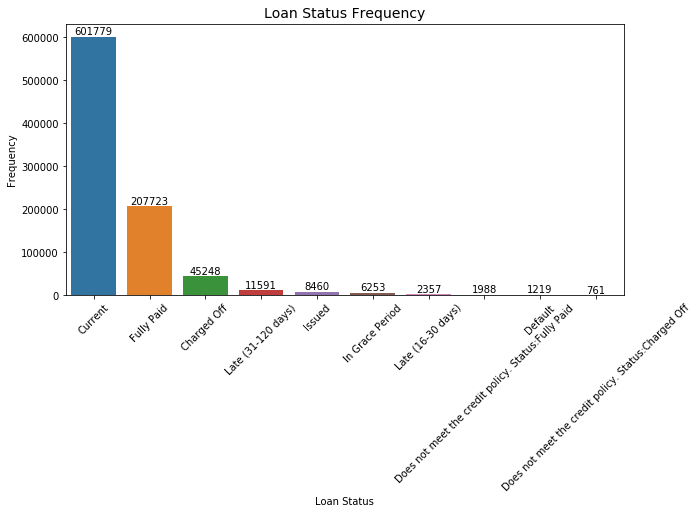

In [7]:
status = loan["loan_status"].value_counts()
plt.figure(figsize = (10, 5))
ax = sns.barplot(status.index, status.values)
plt.title("Loan Status Frequency", fontsize = 14)
plt.xlabel("Loan Status")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
rects = ax.patches
labels = loan["loan_status"].value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, 
               label, ha = "center", va = "bottom")
plt.show()

In [8]:
def fund_condition(lend, fund):
    if abs(fund - lend) == 0:
        return "Full Funded"
    else:
        return "Partial Funded"
    
loan["fund_condition"] = loan.apply(lambda x: fund_condition(x["loan_amnt"], x["funded_amnt"]), axis = 1)

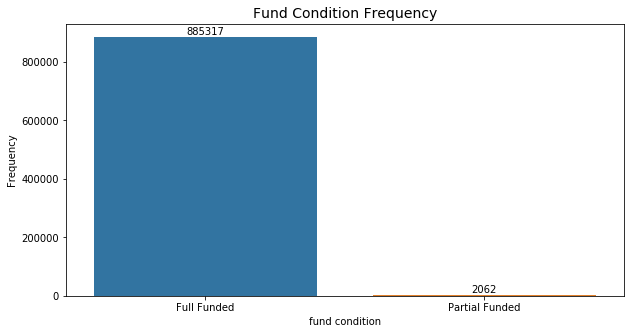

In [9]:
loan_fund_condition = loan["fund_condition"].value_counts()
plt.figure(figsize = (10, 5))
ax = sns.barplot(loan_fund_condition.index, loan_fund_condition.values)
plt.title("Fund Condition Frequency", fontsize = 14)
plt.xlabel("fund condition")
plt.ylabel("Frequency")
rects = ax.patches
labels = loan_fund_condition.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, 
               label, ha = "center", va = "bottom")
plt.show()

In [10]:
print(loan["loan_status"].unique())

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off' 'Issued']


In [11]:
def loan_condition(status):
    if status in ["Charged Off", "Default", "Does not meet the credit policy. Status:Fully Paid", 
                  "Does not meet the credit policy. Status:Charged Off",
                  "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]:
        return "Bad Loan"
    else:
        return "Good Loan"
    
loan["loan_condition"] = "NaN"

loan["loan_condition"] = loan["loan_status"].apply(lambda s: loan_condition(s))

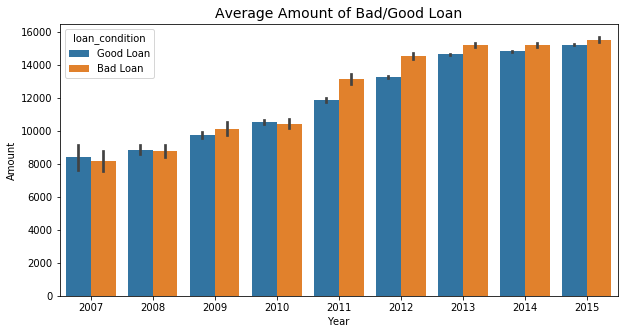

In [12]:
plt.figure(figsize = (10, 5))
sns.barplot(x = "year", y = "loan_amnt", hue = "loan_condition", data = loan)
plt.title("Average Amount of Bad/Good Loan", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Amount")
plt.show()

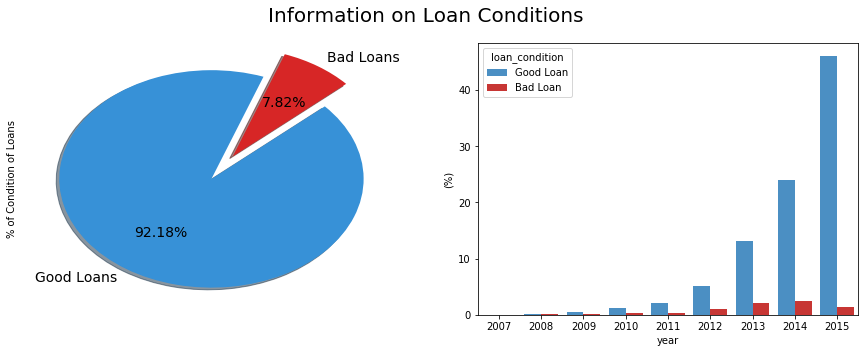

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

colors = ["#3791D7", "#D72626"]
labels = ["Good Loans", "Bad Loans"]

plt.suptitle("Information on Loan Conditions", fontsize = 20)
loan["loan_condition"].value_counts().plot.pie(explode = [0, 0.25], autopct = '%1.2f%%', ax = ax[0], shadow = True, 
                                               colors = colors, labels = labels, fontsize = 14, startangle = 70)
ax[0].set_ylabel("% of Condition of Loans")

sns.barplot(x = "year", y = "loan_amnt", hue = "loan_condition", data = loan, 
            palette = ["#3791D7", "#E01E1B"], estimator = lambda x: len(x)/len(loan)*100)
ax[1].set_xlabel("year")
ax[1].set_ylabel("(%)")
plt.show()

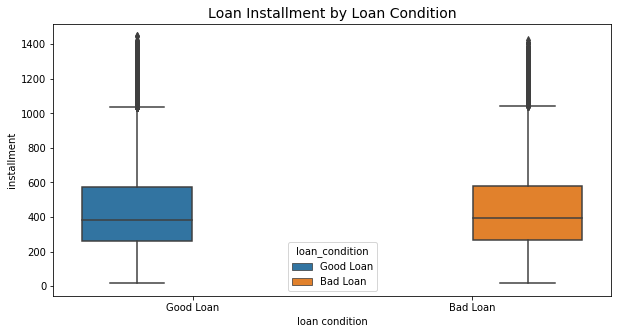

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "loan_condition", y = "installment", hue = "loan_condition", data = loan)
plt.xlabel("loan condition")
plt.ylabel("installment")
plt.title("Loan Installment by Loan Condition", fontsize = 14)
plt.show()

## Loan Analysis by Region

In [15]:
west = ["CA", "OR", "UT", "WA", "CO", "NV", "AK", "MT", "HI", "WY", "ID"]
south_west = ["AZ", "TX", "NM", "OK"]
south_east = ["GA", "NC", "VA", "FL", "KY", "SC", "LA", "AL", "WV", "DC", "AR", "DE", "MS", "TN"]
mid_west = ["IL", "MO", "MN", "OH", "WI", "KS", "MI", "SD", "IA", "NE", "IN", "ND"]
north_east = ["CT", "NY", "PA", "NJ", "RI", "MA", "MD", "VT", "NH", "ME"]

loan["region"] = "NaN"

def finding_regions(state):
    if state in west:
        return "West"
    elif state in south_west:
        return "South West"
    elif state in south_east:
        return "South East"
    elif state in mid_west:
        return "Mid West"
    elif state in north_east:
        return "North East"
    
loan["region"] = loan["addr_state"].apply(finding_regions)

In [16]:
loan["issue_month"] = pd.to_datetime(loan["issue_d"])
loan["issue_month"] = [month.to_period("M") for month in loan["issue_month"]]
month_loan_amnt = loan.groupby(["issue_month", "region"], as_index = False).sum()
month_loan_amnt["loan_amnt"] = month_loan_amnt["loan_amnt"]/1000
month_loan_amnt = pd.DataFrame(data = month_loan_amnt[["issue_month", "region", "loan_amnt"]])

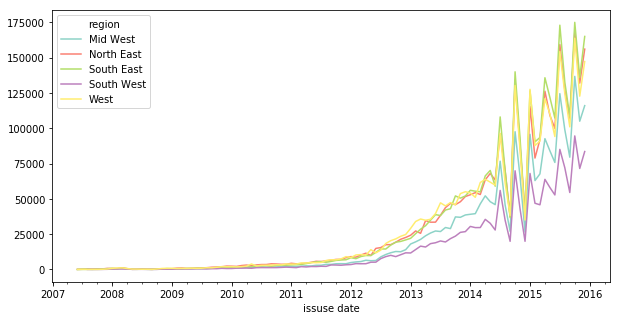

In [17]:
month_loan_amnt = month_loan_amnt.groupby(["issue_month", "region"]).loan_amnt.sum()
month_loan_amnt.unstack().plot(stacked = False, colormap = plt.cm.Set3,
                              grid = False, legend = True, figsize = (10, 5))
plt.xlabel("issuse date")
plt.show()

In [18]:
loan["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
loan["emp_length_int"] = 0

loan.loc[loan["emp_length"] == "10+ years", "emp_length_int"] = 10
loan.loc[loan["emp_length"] == "9 years", "emp_length_int"] = 9
loan.loc[loan["emp_length"] == "8 years", "emp_length_int"] = 8
loan.loc[loan["emp_length"] == "7 years", "emp_length_int"] = 7
loan.loc[loan["emp_length"] == "6 years", "emp_length_int"] = 6
loan.loc[loan["emp_length"] == "5 years", "emp_length_int"] = 5
loan.loc[loan["emp_length"] == "4 years", "emp_length_int"] = 4
loan.loc[loan["emp_length"] == "3 years", "emp_length_int"] = 3
loan.loc[loan["emp_length"] == "2 years", "emp_length_int"] = 2
loan.loc[loan["emp_length"] == "1 years", "emp_length_int"] = 1
loan.loc[loan["emp_length"] == "< 1 years", "emp_length_int"] = 0.5
loan.loc[loan["emp_length"].isna(), "emp_length_int"] = 0

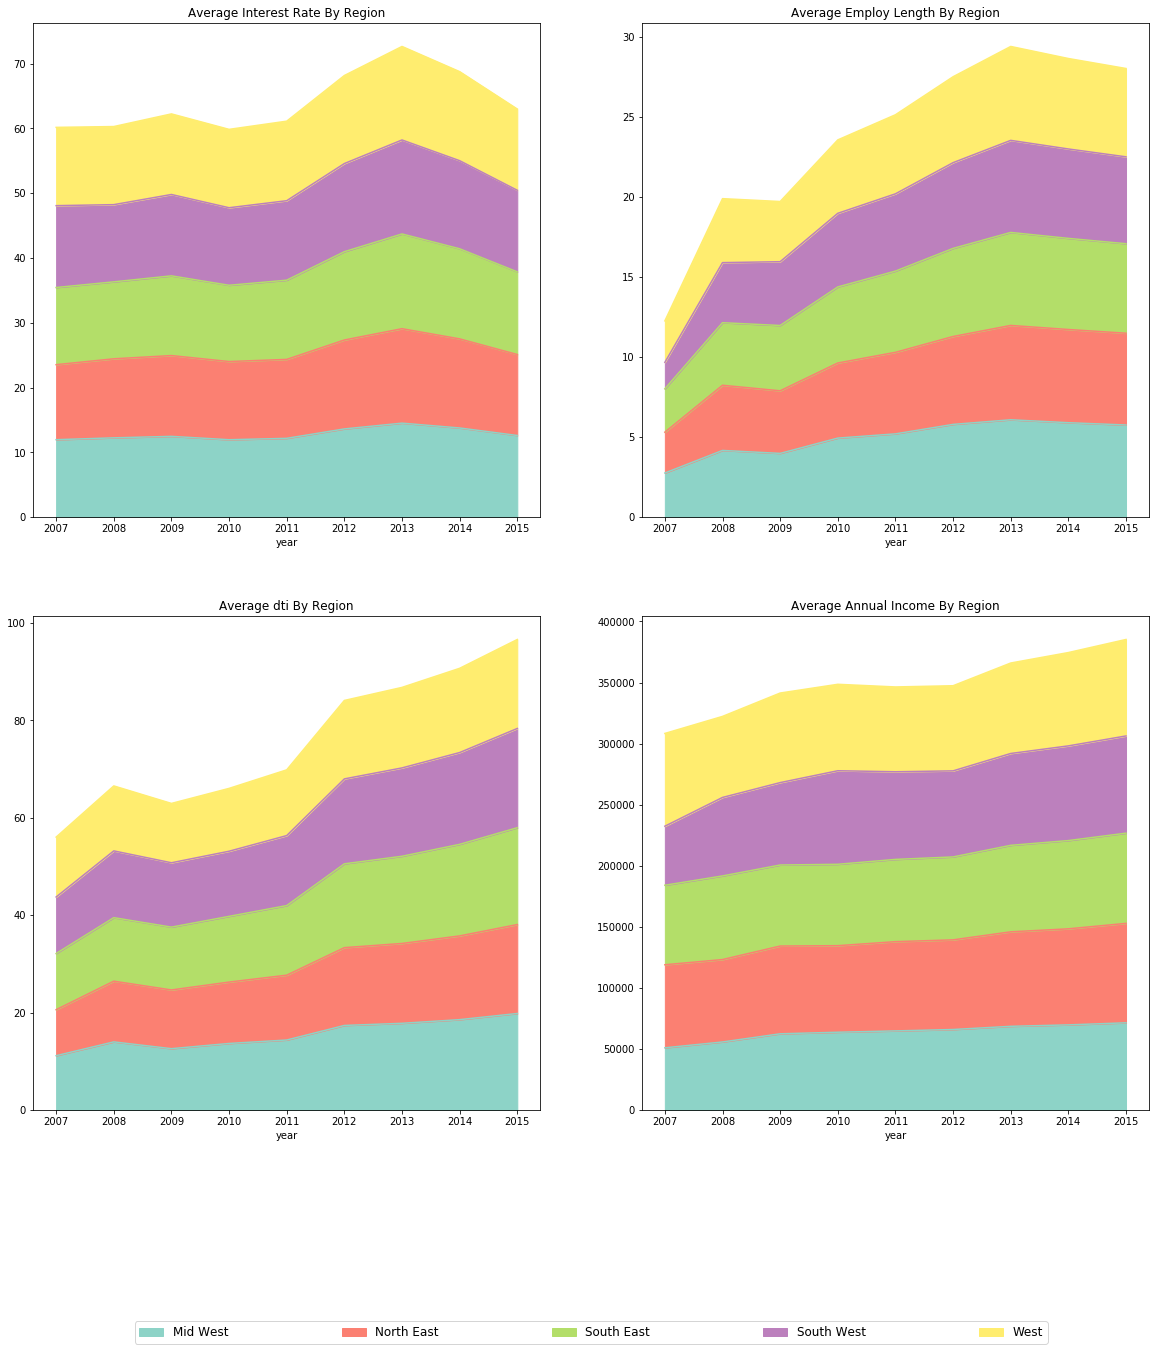

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20, 20))

mean_interest_rate = loan.groupby(["year", "region"]).int_rate.mean()
mean_interest_rate.unstack().plot(kind = "area", stacked = True, colormap = plt.cm.Set3,
                                 grid = False, legend = False, ax = ax1)
ax1.set_title("Average Interest Rate By Region")

mean_emp_length = loan.groupby(["year", "region"]).emp_length_int.mean()
mean_emp_length.unstack().plot(kind = "area", stacked = True, colormap = plt.cm.Set3,
                               grid = False, legend = False, ax = ax2)
ax2.set_title("Average Employ Length By Region")

mean_dti = loan.groupby(["year", "region"]).dti.mean()
mean_dti.unstack().plot(kind = "area", stacked = True, colormap = plt.cm.Set3,
                        grid = False, legend = False, ax = ax3)
ax3.set_title("Average dti By Region")

mean_annual_income = loan.groupby(["year", "region"]).annual_inc.mean()
mean_annual_income.unstack().plot(kind = "area", stacked = True, colormap = plt.cm.Set3,
                                  grid = False, legend = False, ax = ax4)
ax4.set_title("Average Annual Income By Region")
ax4.legend(bbox_to_anchor = (-1.0, -0.5, 1.8, 0.1), loc = 10, prop = {"size": 12},
          ncol = 5, mode = "expand", borderaxespad = 0)
plt.show()

## Loan by Grade

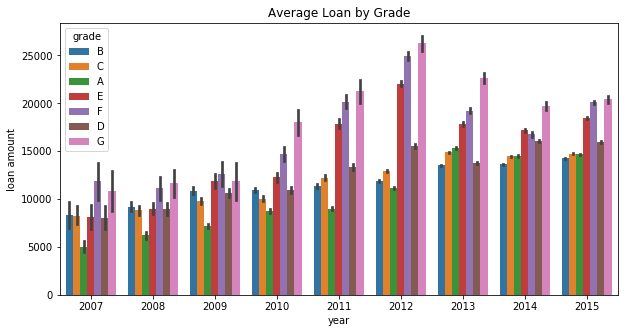

In [21]:
plt.figure(figsize = (10, 5))
sns.barplot(x = "year", y = "loan_amnt", hue = "grade", data = loan)
plt.xlabel("year")
plt.ylabel("loan amount")
plt.title("Average Loan by Grade")
plt.show()

## Lender's Home Ownership Status

In [22]:
loan["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

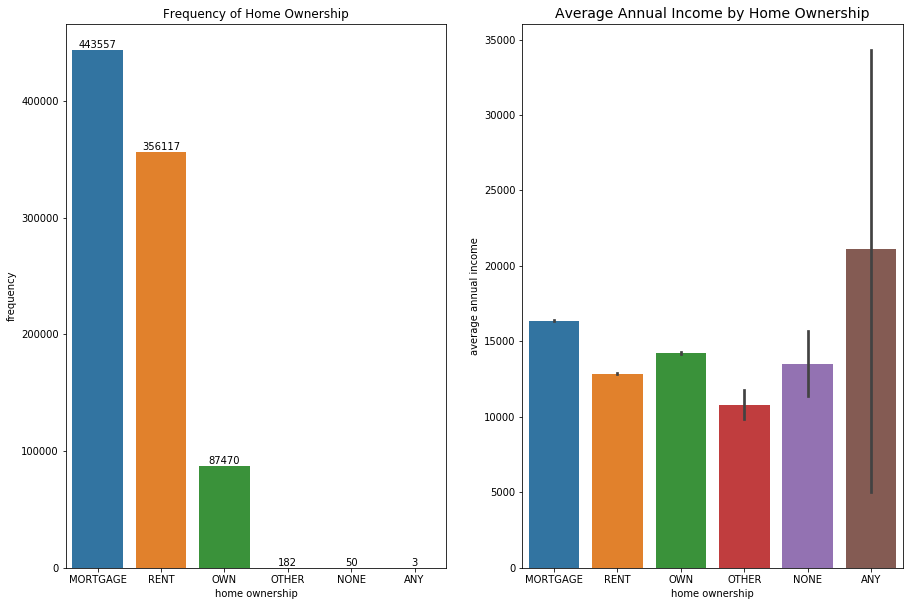

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.barplot(loan["home_ownership"].value_counts().index, loan["home_ownership"].value_counts().values, ax = ax[0])

ax[0].set_xlabel("home ownership")
ax[0].set_ylabel("frequency")
ax[0].set_title("Frequency of Home Ownership")
rects = ax[0].patches
labels = loan["home_ownership"].value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, 
               label, ha = "center", va = "bottom")
    
sns.barplot(loan["home_ownership"], loan["loan_amnt"], ax = ax[1], order = loan["home_ownership"].value_counts().index)
ax[1].set_xlabel("home ownership")
ax[1].set_ylabel("average annual income")
ax[1].set_title("Average Annual Income by Home Ownership", fontsize = 14)
plt.show()

## Loan Purpose

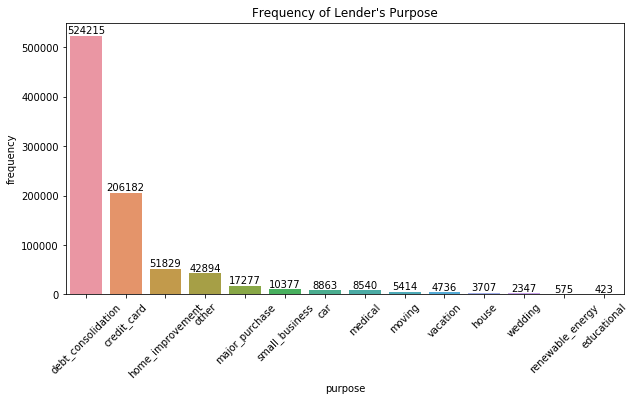

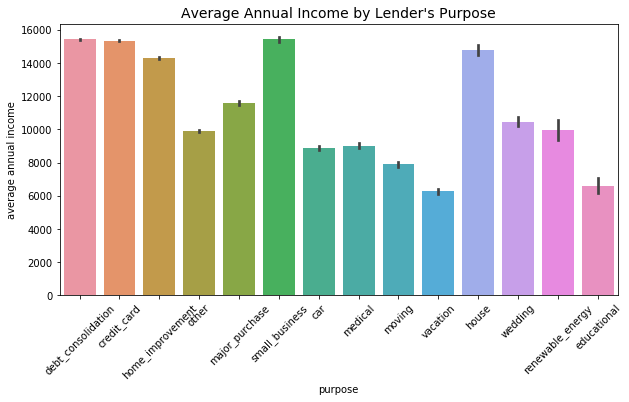

In [33]:
plt.figure(figsize = (10, 5))
ax = sns.barplot(loan["purpose"].value_counts().index, loan["purpose"].value_counts().values)
plt.xlabel("purpose")
plt.ylabel("frequency")
plt.title("Frequency of Lender's Purpose")
rects = ax.patches
labels = loan["purpose"].value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height + 5, 
             label, ha = "center", va = "bottom")
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (10, 5))
sns.barplot(loan["purpose"], loan["loan_amnt"], order = loan["purpose"].value_counts().index)
plt.xlabel("purpose")
plt.ylabel("average annual income")
plt.title("Average Annual Income by Lender's Purpose", fontsize = 14)

plt.xticks(rotation = 45)
plt.show()

## Deeper Insights of Bad Loan

In [25]:
bad_loan = loan.loc[loan["loan_condition"] == "Bad Loan"]
bad_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,year,fund_condition,loan_condition,region,issue_month,emp_length_int
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Full Funded,Bad Loan,South East,2011-12,0.0
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210.0,32.6,13.0,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-2012,152.39,NaN,Aug-2012,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Full Funded,Bad Loan,West,2011-12,4.0
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279.0,36.5,3.0,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-2012,121.45,NaN,Mar-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Full Funded,Bad Loan,South West,2011-12,0.0
12,1064687,1298717,9000.0,9000.0,9000.0,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,245xx,VA,10.08,0.0,Apr-2004,1.0,NaN,NaN,4.0,0.0,10452.0,91.7,9.0,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-2012,305.38,NaN,Nov-2012,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Full Funded,Bad Loan,South East,2011-12,0.0
14,1069057,1303503,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,SFMTA,3 years,RENT,100000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other Loan,951xx,CA,7.06,0.0,May-1991,2.0,NaN,NaN,14.0,0.0,11997.0,55.5,29.0,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-2013,325.74,NaN,Mar-2014,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Full Funded,Bad Loan,West,2011-12,3.0


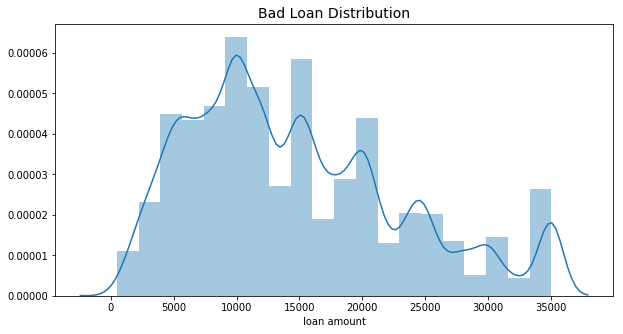

In [26]:
plt.figure(figsize = (10, 5))
sns.distplot(bad_loan["loan_amnt"], kde = True, bins = 20)
plt.xlabel("loan amount")
plt.title("Bad Loan Distribution", fontsize = 14)
plt.show()

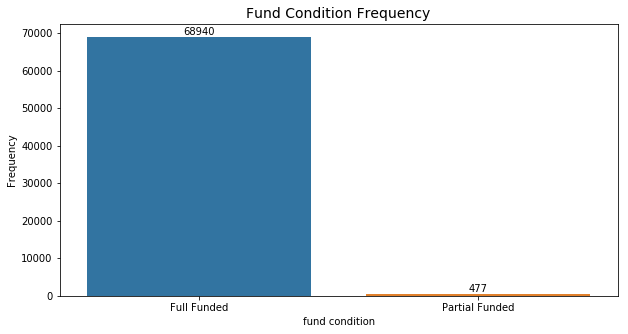

In [27]:
bad_loan_fund_condition = bad_loan["fund_condition"].value_counts()
plt.figure(figsize = (10, 5))
ax = sns.barplot(bad_loan_fund_condition.index, bad_loan_fund_condition.values)
plt.title("Fund Condition Frequency", fontsize = 14)
plt.xlabel("fund condition")
plt.ylabel("Frequency")
rects = ax.patches
labels = bad_loan_fund_condition.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, 
               label, ha = "center", va = "bottom")
plt.show()

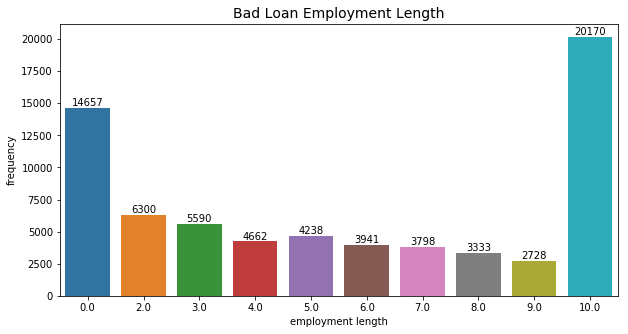

In [28]:
emp_length_of_bad_loan = bad_loan["emp_length_int"].value_counts()
plt.figure(figsize = (10, 5))
ax = sns.barplot(emp_length_of_bad_loan.index, emp_length_of_bad_loan.values)
plt.xlabel("employment length")
plt.ylabel("frequency")
plt.title("Bad Loan Employment Length", fontsize = 14)
rects = ax.patches
labels = emp_length_of_bad_loan.values
idx = list(range(1, len(labels))) + [0]
labels = labels[idx]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, 
             label, ha = "center", va = "bottom")
plt.show()

In [29]:
print("Bad Loan Lender Annual Income Distribution")
bad_loan["annual_inc"].describe()

Bad Loan Lender Annual Income Distribution


count    6.941300e+04
mean     6.746246e+04
std      6.500523e+04
min      1.896000e+03
25%      4.160000e+04
50%      5.800000e+04
75%      8.000000e+04
max      8.900060e+06
Name: annual_inc, dtype: float64

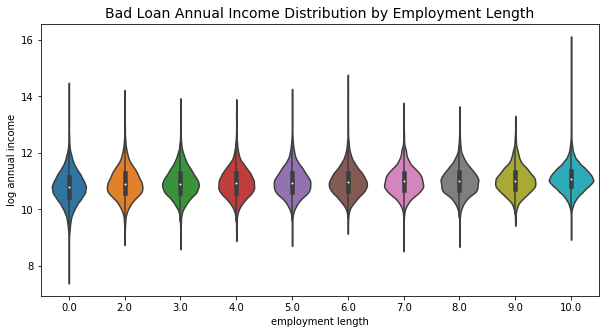

In [30]:
plt.figure(figsize = (10, 5))
sns.violinplot(bad_loan["emp_length_int"], np.log(bad_loan["annual_inc"]))
plt.xlabel("employment length")
plt.ylabel("log annual income")
plt.title("Bad Loan Annual Income Distribution by Employment Length", fontsize = 14)
plt.show()

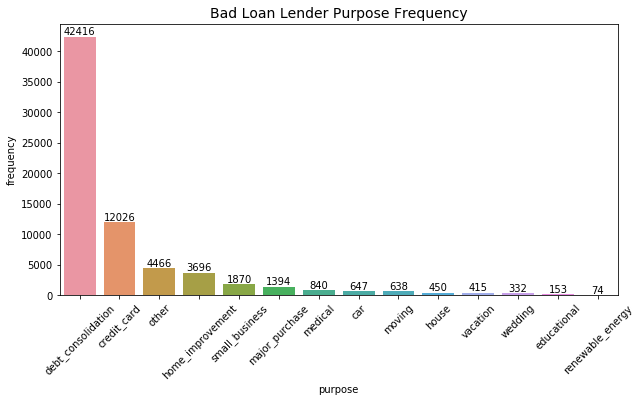

In [31]:
bad_loan_purpose = bad_loan["purpose"].value_counts()

plt.figure(figsize = (10, 5))
ax = sns.barplot(bad_loan_purpose.index, bad_loan_purpose.values)
plt.xlabel("purpose")
plt.xticks(rotation = 45)
plt.ylabel("frequency")
plt.title("Bad Loan Lender Purpose Frequency", fontsize = 14)
rects = ax.patches
labels = bad_loan_purpose.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, 
             label, ha = "center", va = "bottom")
plt.show()